## Viewing variables, attributes and dimensions - the 3 key parts of netcdf files

In [11]:
import netCDF4 as nc

# Open the netCDF file
file_path = 'C:\\Users\\arush\\Desktop\\RESEARCH PROJECTS\\iSURP-CLIMATE ENGINEERING\\pr_Amon_IPSL-CM6A-LR_G1_r1i1p1f1_gr_185001-194912.nc'
dataset = nc.Dataset(file_path)
# the double slash \\ in file location is to clarify compiler that \ is not being used as an exit or newline character
# Access dimensions
dims = dataset.dimensions

# Access variables
variables = dataset.variables

# Access attributes
attributes = dataset.ncattrs()
print(f"Data type of what we are displaying in respective order(dimensions,variables, attributes):\n {type(dims), type(variables),type(attributes)}")
print("\n")

#Now we know that dimensions and variables are dictionaries, while attributes is a list. So, here we go.


# Iterate over the dictionary and print key-value pairs for dimensions
print("DIMENSIONS: \n")
for i, (key, value) in enumerate(dims.items(), 1):
    print(f"{i}. {key}: {value}")
print(" ")
print(" ")
# Iterate over the dictionary and print key-value pairs for variables
print("VARIABLES: \n")
for i, (key, value) in enumerate(variables.items(), 1):
    print(f"{i}. {key}: {value}")
    print(key, ':', value)
print(" ")
print(" ")
# Iterate over the attributes list and print each item
print("ATTRIBUTES: \n")
for item in attributes:
    print(item)
# Close the netCDF file
dataset.close()

Data type of what we are displaying in respective order(dimensions,variables, attributes):
 (<class 'dict'>, <class 'dict'>, <class 'list'>)


DIMENSIONS: 

1. axis_nbounds: <class 'netCDF4._netCDF4.Dimension'>: name = 'axis_nbounds', size = 2
2. lon: <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144
3. lat: <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 143
4. time: <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1200
 
 
VARIABLES: 

1. lat: <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    axis: Y
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
unlimited dimensions: 
current shape = (143,)
filling off
lat : <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    axis: Y
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
unlimited dimensions: 
current shape = (143,)
filling off
2. lon: <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    axis: X
    standard_name: longi

## Details of all Attributes and Metadata in the File

In [12]:
import netCDF4 as nc

# Open the NetCDF file
dataset = nc.Dataset(file_path)
# Get the attributes
attributes = dataset.ncattrs()

# Iterate over the attributes and print their names and values
for attribute in attributes:
    value = getattr(dataset, attribute)
    print(f"{attribute}: {value}")

# Close the NetCDF file
dataset.close()

name: /
Conventions: CF-1.7 CMIP-6.2
creation_date: 2018-06-04T14:23:44Z
tracking_id: hdl:21.14100/3d812bb8-ac29-4cd8-9ff5-e9dbfb092fbd
description: Beginning from a preindustrial control run, simultaneously quadruple the CO2 concentration and reduce the solar constant such that the TOA radiative flux remains within +/m0.1 W/m2
title: IPSL-CM6A-LR model output prepared for CMIP6 / GeoMIP G1
activity_id: GeoMIP
contact: ipsl-cmip6@listes.ipsl.fr
data_specs_version: 01.00.21
dr2xml_version: 1.8
experiment_id: G1
experiment: abrupt quadrupling of CO2 plus reduction in total solar irradiance
external_variables: areacella
forcing_index: 1
frequency: mon
further_info_url: https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM6A-LR.G1.none.r1i1p1f1
grid: LMDZ grid
grid_label: gr
nominal_resolution: 250 km
history: none
initialization_index: 1
institution_id: IPSL
institution: Institut Pierre Simon Laplace, Paris 75252, France
license: CMIP6 model data produced by IPSL is licensed under a Creative 

## Using xarray library, obtaining summary of the dataset's structure and metadata.

In [13]:
import xarray as xr

# Open the NetCDF file
dataset = xr.open_dataset(file_path)

# View the dataset
print(dataset)

# Close the dataset when you're done
dataset.close()

<xarray.Dataset>
Dimensions:      (lat: 143, lon: 144, time: 1200, axis_nbounds: 2)
Coordinates:
  * lat          (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 1949-12-16T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    pr           (time, lat, lon) float32 ...
Attributes: (12/50)
    name:                   /ccc/work/cont003/gencmip6/lurtont/IGCM_OUT/IPSLC...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-06-04T14:23:44Z
    tracking_id:            hdl:21.14100/3d812bb8-ac29-4cd8-9ff5-e9dbfb092fbd
    description:            Beginning from a preindustrial control run, simul...
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / Ge...
    ...                     ...
    variable_id:            pr
   

## Printing all the values of all the variables

In [14]:
import netCDF4 as nc

# Open the netCDF file
dataset = nc.Dataset(file_path)

# Print all variables and their data
for variable in dataset.variables:
    print(f"Variable: {variable}")
    print(f"Data: {dataset.variables[variable][:]}")
    print("-------------------")

# Close the netCDF file
dataset.close()

Variable: lat
Data: [-90.        -88.73239   -87.46479   -86.19718   -84.92958   -83.66197
 -82.39436   -81.12676   -79.85915   -78.59155   -77.323944  -76.056335
 -74.788734  -73.521126  -72.253525  -70.985916  -69.71831   -68.45071
 -67.1831    -65.91549   -64.64789   -63.380283  -62.112675  -60.84507
 -59.577465  -58.30986   -57.042255  -55.774647  -54.507042  -53.239437
 -51.971832  -50.704224  -49.43662   -48.169014  -46.90141   -45.633804
 -44.366196  -43.09859   -41.830986  -40.56338   -39.295776  -38.028168
 -36.760563  -35.492958  -34.225353  -32.957745  -31.690142  -30.422535
 -29.15493   -27.887323  -26.619719  -25.352112  -24.084507  -22.816902
 -21.549295  -20.28169   -19.014084  -17.746479  -16.478872  -15.211267
 -13.943662  -12.676056  -11.408451  -10.140845   -8.8732395  -7.6056337
  -6.338028   -5.0704226  -3.8028169  -2.5352113  -1.2676057   0.
   1.2676057   2.5352113   3.8028169   5.0704226   6.338028    7.6056337
   8.8732395  10.140845   11.408451   12.676056   1

## Printing time bounds data (just for clarity)

In [15]:
import netCDF4 as nc

# Open the netCDF file
dataset = nc.Dataset(file_path)

# Access the time_bounds variable
time_bounds = dataset.variables['time_bounds']

# Retrieve the data
time_bounds_data = time_bounds[:]

# Print the values
print(time_bounds_data)

# Close the netCDF file
dataset.close()

[[0.0000e+00 3.1000e+01]
 [3.1000e+01 5.9000e+01]
 [5.9000e+01 9.0000e+01]
 ...
 [3.6432e+04 3.6463e+04]
 [3.6463e+04 3.6493e+04]
 [3.6493e+04 3.6524e+04]]


In [16]:
import netCDF4 as nc

# Open the netCDF file
dataset = nc.Dataset(file_path)
#units of time variables:
unit = dataset.variables['time'].units
print("Unit of time variable:", unit)
print(" ")
# Access the "time_bnds" variable
time_bnds = dataset.variables['time_bounds'][:]

# Loop through the time intervals
for i in range(len(time_bnds)):
    lower_bound = time_bnds[i, 0]
    upper_bound = time_bnds[i, 1]
    print(f"Time Interval {i+1}: [{lower_bound}, {upper_bound}]")

# Close the netCDF file
dataset.close()

Unit of time variable: days since 1850-01-01 00:00:00
 
Time Interval 1: [0.0, 31.0]
Time Interval 2: [31.0, 59.0]
Time Interval 3: [59.0, 90.0]
Time Interval 4: [90.0, 120.0]
Time Interval 5: [120.0, 151.0]
Time Interval 6: [151.0, 181.0]
Time Interval 7: [181.0, 212.0]
Time Interval 8: [212.0, 243.0]
Time Interval 9: [243.0, 273.0]
Time Interval 10: [273.0, 304.0]
Time Interval 11: [304.0, 334.0]
Time Interval 12: [334.0, 365.0]
Time Interval 13: [365.0, 396.0]
Time Interval 14: [396.0, 424.0]
Time Interval 15: [424.0, 455.0]
Time Interval 16: [455.0, 485.0]
Time Interval 17: [485.0, 516.0]
Time Interval 18: [516.0, 546.0]
Time Interval 19: [546.0, 577.0]
Time Interval 20: [577.0, 608.0]
Time Interval 21: [608.0, 638.0]
Time Interval 22: [638.0, 669.0]
Time Interval 23: [669.0, 699.0]
Time Interval 24: [699.0, 730.0]
Time Interval 25: [730.0, 761.0]
Time Interval 26: [761.0, 790.0]
Time Interval 27: [790.0, 821.0]
Time Interval 28: [821.0, 851.0]
Time Interval 29: [851.0, 882.0]
Time

## Values of precipitation along with latitude,longitude and time they have been mentioned for

In [57]:
import ctypes

ctypes.windll.kernel32.SetThreadExecutionState(0x80000002) #this will prevent the screen saver or sleep. 
import xarray as xr

# Open the NetCDF file
dataset = xr.open_dataset(file_path)


# Access the precipitation variable
precipitation = dataset['pr']
print(type(precipitation))
# Iterate over the dimensions and print the values
for t in range(precipitation.shape[0]):
    for lat in range(precipitation.shape[1]):
        for lon in range(precipitation.shape[2]):
            print("Time:", dataset['time'][t].values)
            print("Latitude:", dataset['lat'][lat].values)
            print("Longitude:", dataset['lon'][lon].values)
            print("Precipitation:", precipitation[t,lat,lon].values)
            print("---")
# Close the dataset
dataset.close()


<class 'xarray.core.dataarray.DataArray'>
Time: 1850-01-16T12:00:00.000000000
Latitude: -90.0
Longitude: 0.0
Precipitation: 1.6274384506687056e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -90.0
Longitude: 2.5
Precipitation: 1.6274384506687056e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -90.0
Longitude: 5.0
Precipitation: 1.6274384506687056e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -90.0
Longitude: 7.5
Precipitation: 1.6274384506687056e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -90.0
Longitude: 10.0
Precipitation: 1.6274384506687056e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -90.0
Longitude: 12.5
Precipitation: 1.6274384506687056e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -90.0
Longitude: 15.0
Precipitation: 1.6274384506687056e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -90.0
Longitude: 17.5
Precipitation: 1.6274384506687056e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -90.0
Longitude: 20.0
Precipitation:

Precipitation: 2.343104597457568e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 37.5
Precipitation: 2.264277327412856e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 40.0
Precipitation: 2.3166751361713978e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 42.5
Precipitation: 2.273833842991735e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 45.0
Precipitation: 2.281541583215585e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 47.5
Precipitation: 2.1602838842227357e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 50.0
Precipitation: 2.2102024104242446e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 52.5
Precipitation: 2.1090374957566382e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 55.0
Precipitation: 2.1642804313160013e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.

Precipitation: 3.424324177103699e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 342.5
Precipitation: 3.2114585337694734e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 345.0
Precipitation: 2.996408284161589e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 347.5
Precipitation: 2.9775401344522834e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 350.0
Precipitation: 2.8508131890703226e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 352.5
Precipitation: 2.847105633918545e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 355.0
Precipitation: 2.779709802780417e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -88.73239
Longitude: 357.5
Precipitation: 2.790319513223949e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -87.46479
Longitude: 0.0
Precipitation: 1.428712948836619e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 

Precipitation: 8.978165624284884e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -86.19718
Longitude: 52.5
Precipitation: 9.245500223187264e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -86.19718
Longitude: 55.0
Precipitation: 8.953498422670236e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -86.19718
Longitude: 57.5
Precipitation: 8.273247544821061e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -86.19718
Longitude: 60.0
Precipitation: 9.93208914223942e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -86.19718
Longitude: 62.5
Precipitation: 1.0316338148186333e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -86.19718
Longitude: 65.0
Precipitation: 1.0332893225495354e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -86.19718
Longitude: 67.5
Precipitation: 1.0058375892185722e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -86.19718
Longitude: 70.0
Precipitation: 1.093266405405302e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -86.197

Precipitation: 9.866702157523832e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -84.92958
Longitude: 95.0
Precipitation: 9.839307040238054e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -84.92958
Longitude: 97.5
Precipitation: 9.91684828477446e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -84.92958
Longitude: 100.0
Precipitation: 1.073534235729312e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -84.92958
Longitude: 102.5
Precipitation: 1.13208716356894e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -84.92958
Longitude: 105.0
Precipitation: 1.1427032404753845e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -84.92958
Longitude: 107.5
Precipitation: 1.1102541748186923e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -84.92958
Longitude: 110.0
Precipitation: 1.1118945622001775e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -84.92958
Longitude: 112.5
Precipitation: 1.0651650654835976e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -

Precipitation: 6.962189900150406e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -83.66197
Longitude: 92.5
Precipitation: 7.276035489667265e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -83.66197
Longitude: 95.0
Precipitation: 7.082199999786098e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -83.66197
Longitude: 97.5
Precipitation: 7.058993105601985e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -83.66197
Longitude: 100.0
Precipitation: 7.609687600051984e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -83.66197
Longitude: 102.5
Precipitation: 7.446179779435624e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -83.66197
Longitude: 105.0
Precipitation: 7.430333539559797e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -83.66197
Longitude: 107.5
Precipitation: 7.298550599443843e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -83.66197
Longitude: 110.0
Precipitation: 6.738955562468618e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -83.

Precipitation: 3.542575655046676e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -82.39436
Longitude: 115.0
Precipitation: 4.207259962640819e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -82.39436
Longitude: 117.5
Precipitation: 5.059125101070094e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -82.39436
Longitude: 120.0
Precipitation: 4.18381233657783e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -82.39436
Longitude: 122.5
Precipitation: 4.86541125610529e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -82.39436
Longitude: 125.0
Precipitation: 5.616947760245239e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -82.39436
Longitude: 127.5
Precipitation: 6.029794690221024e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -82.39436
Longitude: 130.0
Precipitation: 5.896758921153378e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -82.39436
Longitude: 132.5
Precipitation: 5.899086659155728e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -82

Precipitation: 3.928572880340653e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -81.12676
Longitude: 142.5
Precipitation: 3.5313905755174346e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -81.12676
Longitude: 145.0
Precipitation: 2.856812955087662e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -81.12676
Longitude: 147.5
Precipitation: 2.590415988379391e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -81.12676
Longitude: 150.0
Precipitation: 1.9074383317274624e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -81.12676
Longitude: 152.5
Precipitation: 1.9491224634293758e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -81.12676
Longitude: 155.0
Precipitation: 8.298806619677634e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -81.12676
Longitude: 157.5
Precipitation: 1.7775395235730684e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -81.12676
Longitude: 160.0
Precipitation: 3.1932329420669703e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitu

Precipitation: 8.512783097103238e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -79.85915
Longitude: 285.0
Precipitation: 5.499350663740188e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -79.85915
Longitude: 287.5
Precipitation: 2.358719939365983e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -79.85915
Longitude: 290.0
Precipitation: 2.981404804813792e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -79.85915
Longitude: 292.5
Precipitation: 3.052983856832725e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -79.85915
Longitude: 295.0
Precipitation: 2.8908534659422003e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -79.85915
Longitude: 297.5
Precipitation: 2.7896494430024177e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -79.85915
Longitude: 300.0
Precipitation: 4.83089979752549e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -79.85915
Longitude: 302.5
Precipitation: 5.175862042960944e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 

Precipitation: 2.1798872694489546e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -78.59155
Longitude: 277.5
Precipitation: 1.0865629519685172e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -78.59155
Longitude: 280.0
Precipitation: 1.8706223272602074e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -78.59155
Longitude: 282.5
Precipitation: 4.573401838570135e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -78.59155
Longitude: 285.0
Precipitation: 2.391646148680593e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -78.59155
Longitude: 287.5
Precipitation: 2.022855596806039e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -78.59155
Longitude: 290.0
Precipitation: 1.8057022543871426e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -78.59155
Longitude: 292.5
Precipitation: 1.8085202100337483e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -78.59155
Longitude: 295.0
Precipitation: 1.6357702179448097e-06
---
Time: 1850-01-16T12:00:00.000000000
Latit

Precipitation: 1.301283646171214e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -77.323944
Longitude: 260.0
Precipitation: 1.7377580661559477e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -77.323944
Longitude: 262.5
Precipitation: 2.167806633224245e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -77.323944
Longitude: 265.0
Precipitation: 2.874378151318524e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -77.323944
Longitude: 267.5
Precipitation: 1.8814720533555374e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -77.323944
Longitude: 270.0
Precipitation: 1.1774911399697885e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -77.323944
Longitude: 272.5
Precipitation: 1.6061580026871525e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -77.323944
Longitude: 275.0
Precipitation: 3.31866649503354e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -77.323944
Longitude: 277.5
Precipitation: 2.221786417067051e-05
---
Time: 1850-01-16T12:00:00.000000000


Precipitation: 2.0942705305060372e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -76.056335
Longitude: 282.5
Precipitation: 1.7099826436606236e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -76.056335
Longitude: 285.0
Precipitation: 5.1490428631950635e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -76.056335
Longitude: 287.5
Precipitation: 1.426267544957227e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -76.056335
Longitude: 290.0
Precipitation: 2.9358750452956883e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -76.056335
Longitude: 292.5
Precipitation: 8.929485488806677e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -76.056335
Longitude: 295.0
Precipitation: 1.5386017366836313e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -76.056335
Longitude: 297.5
Precipitation: 2.27268492380972e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -76.056335
Longitude: 300.0
Precipitation: 4.402280410431558e-06
---
Time: 1850-01-16T12:00:00.000000000

Precipitation: 5.1536837418098e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -74.788734
Longitude: 282.5
Precipitation: 5.122368747834116e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -74.788734
Longitude: 285.0
Precipitation: 3.771164483623579e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -74.788734
Longitude: 287.5
Precipitation: 4.0057027945294976e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -74.788734
Longitude: 290.0
Precipitation: 3.36538978444878e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -74.788734
Longitude: 292.5
Precipitation: 1.8003698642132804e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -74.788734
Longitude: 295.0
Precipitation: 5.351322670321679e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -74.788734
Longitude: 297.5
Precipitation: 5.233028787188232e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -74.788734
Longitude: 300.0
Precipitation: 1.6845713162183529e-06
---
Time: 1850-01-16T12:00:00.000000000
Lat

Precipitation: 5.140575012774207e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -73.521126
Longitude: 295.0
Precipitation: 1.7841528460849077e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -73.521126
Longitude: 297.5
Precipitation: 3.864895006699953e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -73.521126
Longitude: 300.0
Precipitation: 4.567225005303044e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -73.521126
Longitude: 302.5
Precipitation: 2.2843298665975453e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -73.521126
Longitude: 305.0
Precipitation: 1.8731153659246047e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -73.521126
Longitude: 307.5
Precipitation: 3.6915105283696903e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -73.521126
Longitude: 310.0
Precipitation: 4.802763669431442e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -73.521126
Longitude: 312.5
Precipitation: 4.644025466404855e-06
---
Time: 1850-01-16T12:00:00.000000000

Precipitation: 1.1677980182867032e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -72.253525
Longitude: 260.0
Precipitation: 2.098189725074917e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -72.253525
Longitude: 262.5
Precipitation: 3.0096989576122724e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -72.253525
Longitude: 265.0
Precipitation: 3.3617205190239474e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -72.253525
Longitude: 267.5
Precipitation: 3.454691977822222e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -72.253525
Longitude: 270.0
Precipitation: 3.9038321119733155e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -72.253525
Longitude: 272.5
Precipitation: 3.743210982065648e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -72.253525
Longitude: 275.0
Precipitation: 4.1788687667576596e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -72.253525
Longitude: 277.5
Precipitation: 3.4590204450068995e-05
---
Time: 1850-01-16T12:00:00.0000000

Precipitation: 6.0667298384942114e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -70.985916
Longitude: 235.0
Precipitation: 7.4081544880755246e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -70.985916
Longitude: 237.5
Precipitation: 7.605598057125462e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -70.985916
Longitude: 240.0
Precipitation: 8.797458576736972e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -70.985916
Longitude: 242.5
Precipitation: 9.172224054054823e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -70.985916
Longitude: 245.0
Precipitation: 1.159352086688159e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -70.985916
Longitude: 247.5
Precipitation: 1.1506721421028487e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -70.985916
Longitude: 250.0
Precipitation: 1.0567671779426746e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -70.985916
Longitude: 252.5
Precipitation: 1.0628907148202416e-05
---
Time: 1850-01-16T12:00:00.00000000

Precipitation: 1.5438796253874898e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -68.45071
Longitude: 10.0
Precipitation: 1.5243044799717609e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -68.45071
Longitude: 12.5
Precipitation: 1.2228812011016998e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -68.45071
Longitude: 15.0
Precipitation: 9.652452718000859e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -68.45071
Longitude: 17.5
Precipitation: 6.172868779685814e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -68.45071
Longitude: 20.0
Precipitation: 7.4504191616142634e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -68.45071
Longitude: 22.5
Precipitation: 8.070057447184809e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -68.45071
Longitude: 25.0
Precipitation: 8.516244633938186e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -68.45071
Longitude: 27.5
Precipitation: 1.241444897459587e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -68.4

Precipitation: 7.212391665234463e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -67.1831
Longitude: 42.5
Precipitation: 4.142820216657128e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -67.1831
Longitude: 45.0
Precipitation: 1.5522529110967298e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -67.1831
Longitude: 47.5
Precipitation: 1.191284923152125e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -67.1831
Longitude: 50.0
Precipitation: 1.0091927833855152e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -67.1831
Longitude: 52.5
Precipitation: 9.873107046587393e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -67.1831
Longitude: 55.0
Precipitation: 9.367078746436164e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -67.1831
Longitude: 57.5
Precipitation: 2.6321014956920408e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -67.1831
Longitude: 60.0
Precipitation: 7.73744523030473e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -67.1831
Longit

Precipitation: 4.809733582078479e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -65.91549
Longitude: 112.5
Precipitation: 1.2144428183091804e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -65.91549
Longitude: 115.0
Precipitation: 2.4475784812239e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -65.91549
Longitude: 117.5
Precipitation: 2.565923387010116e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -65.91549
Longitude: 120.0
Precipitation: 1.2645436981983948e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -65.91549
Longitude: 122.5
Precipitation: 1.4333346371131483e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -65.91549
Longitude: 125.0
Precipitation: 1.2732527466141619e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -65.91549
Longitude: 127.5
Precipitation: 1.705271097307559e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -65.91549
Longitude: 130.0
Precipitation: 1.649097066547256e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude:

Precipitation: 4.6447006752714515e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -64.64789
Longitude: 137.5
Precipitation: 4.563520633382723e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -64.64789
Longitude: 140.0
Precipitation: 4.755173722514883e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -64.64789
Longitude: 142.5
Precipitation: 4.2581374145811424e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -64.64789
Longitude: 145.0
Precipitation: 3.022176679223776e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -64.64789
Longitude: 147.5
Precipitation: 3.372926948941313e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -64.64789
Longitude: 150.0
Precipitation: 3.087040749960579e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -64.64789
Longitude: 152.5
Precipitation: 2.5806120902416296e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -64.64789
Longitude: 155.0
Precipitation: 2.072467395919375e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude

Precipitation: 2.4313863832503557e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -63.380283
Longitude: 202.5
Precipitation: 2.6094288841704838e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -63.380283
Longitude: 205.0
Precipitation: 1.8664193703443743e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -63.380283
Longitude: 207.5
Precipitation: 2.1105848645674996e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -63.380283
Longitude: 210.0
Precipitation: 2.1139527234481648e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -63.380283
Longitude: 212.5
Precipitation: 1.8428230760036968e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -63.380283
Longitude: 215.0
Precipitation: 1.6982459783321247e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -63.380283
Longitude: 217.5
Precipitation: 1.885457822936587e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -63.380283
Longitude: 220.0
Precipitation: 1.8198148609371856e-05
---
Time: 1850-01-16T12:00:00.00000

Precipitation: 2.0857551135122776e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -62.112675
Longitude: 220.0
Precipitation: 2.2569989596377127e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -62.112675
Longitude: 222.5
Precipitation: 2.2790947696194053e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -62.112675
Longitude: 225.0
Precipitation: 2.055932054645382e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -62.112675
Longitude: 227.5
Precipitation: 1.7419048162992112e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -62.112675
Longitude: 230.0
Precipitation: 1.4023128642293159e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -62.112675
Longitude: 232.5
Precipitation: 1.4838358765700832e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -62.112675
Longitude: 235.0
Precipitation: 1.6581443560426123e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -62.112675
Longitude: 237.5
Precipitation: 2.017698898271192e-05
---
Time: 1850-01-16T12:00:00.000000

Precipitation: 1.7493588529760018e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -60.84507
Longitude: 262.5
Precipitation: 1.8513181203161366e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -60.84507
Longitude: 265.0
Precipitation: 3.105854557361454e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -60.84507
Longitude: 267.5
Precipitation: 4.1204719309462234e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -60.84507
Longitude: 270.0
Precipitation: 4.044440356665291e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -60.84507
Longitude: 272.5
Precipitation: 3.0258588594733737e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -60.84507
Longitude: 275.0
Precipitation: 3.2996733352774754e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -60.84507
Longitude: 277.5
Precipitation: 2.797044362523593e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -60.84507
Longitude: 280.0
Precipitation: 3.646246113930829e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitu

Precipitation: 1.9829933080472983e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -59.577465
Longitude: 247.5
Precipitation: 2.0473053155001253e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -59.577465
Longitude: 250.0
Precipitation: 1.872886969067622e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -59.577465
Longitude: 252.5
Precipitation: 2.213621155533474e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -59.577465
Longitude: 255.0
Precipitation: 2.2703694412484765e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -59.577465
Longitude: 257.5
Precipitation: 1.7906677385326475e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -59.577465
Longitude: 260.0
Precipitation: 2.367882007092703e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -59.577465
Longitude: 262.5
Precipitation: 1.706385228317231e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -59.577465
Longitude: 265.0
Precipitation: 1.746884299791418e-05
---
Time: 1850-01-16T12:00:00.000000000

Precipitation: 3.2813251891639084e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -58.30986
Longitude: 277.5
Precipitation: 3.805743472184986e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -58.30986
Longitude: 280.0
Precipitation: 3.9892696804599836e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -58.30986
Longitude: 282.5
Precipitation: 4.64832664874848e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -58.30986
Longitude: 285.0
Precipitation: 3.17581434501335e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -58.30986
Longitude: 287.5
Precipitation: 2.6331041226512752e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -58.30986
Longitude: 290.0
Precipitation: 2.722309363889508e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -58.30986
Longitude: 292.5
Precipitation: 3.1444775231648237e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -58.30986
Longitude: 295.0
Precipitation: 3.031677260878496e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude:

Precipitation: 3.54583389707841e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -57.042255
Longitude: 277.5
Precipitation: 4.5983520976733416e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -57.042255
Longitude: 280.0
Precipitation: 4.8304867959814146e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -57.042255
Longitude: 282.5
Precipitation: 4.117181379115209e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -57.042255
Longitude: 285.0
Precipitation: 3.4337084798607975e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -57.042255
Longitude: 287.5
Precipitation: 3.5786779335467145e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -57.042255
Longitude: 290.0
Precipitation: 3.555927469278686e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -57.042255
Longitude: 292.5
Precipitation: 2.0797710021724924e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -57.042255
Longitude: 295.0
Precipitation: 2.6758090825751424e-05
---
Time: 1850-01-16T12:00:00.00000000

Precipitation: 4.29747742600739e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -55.774647
Longitude: 277.5
Precipitation: 5.194368350203149e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -55.774647
Longitude: 280.0
Precipitation: 4.8922476707957685e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -55.774647
Longitude: 282.5
Precipitation: 4.27517770731356e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -55.774647
Longitude: 285.0
Precipitation: 4.8567395424470305e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -55.774647
Longitude: 287.5
Precipitation: 4.248074037604965e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -55.774647
Longitude: 290.0
Precipitation: 1.724897083477117e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -55.774647
Longitude: 292.5
Precipitation: 1.3195914107200224e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -55.774647
Longitude: 295.0
Precipitation: 2.325734203623142e-05
---
Time: 1850-01-16T12:00:00.000000000
La

Precipitation: 3.113377169938758e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -53.239437
Longitude: 12.5
Precipitation: 2.9337650630623102e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -53.239437
Longitude: 15.0
Precipitation: 3.205987377441488e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -53.239437
Longitude: 17.5
Precipitation: 2.945612504845485e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -53.239437
Longitude: 20.0
Precipitation: 3.552180351107381e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -53.239437
Longitude: 22.5
Precipitation: 3.233777533750981e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -53.239437
Longitude: 25.0
Precipitation: 2.827514981618151e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -53.239437
Longitude: 27.5
Precipitation: 2.471633706591092e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -53.239437
Longitude: 30.0
Precipitation: 2.4417942768195644e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude:

Precipitation: 2.762433359748684e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -51.971832
Longitude: 37.5
Precipitation: 3.122197085758671e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -51.971832
Longitude: 40.0
Precipitation: 3.624166492954828e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -51.971832
Longitude: 42.5
Precipitation: 3.335527071612887e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -51.971832
Longitude: 45.0
Precipitation: 3.462890526861884e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -51.971832
Longitude: 47.5
Precipitation: 3.5255507100373507e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -51.971832
Longitude: 50.0
Precipitation: 3.39919570251368e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -51.971832
Longitude: 52.5
Precipitation: 4.398841701913625e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -51.971832
Longitude: 55.0
Precipitation: 5.258903547655791e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -

Precipitation: 2.844644768629223e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -50.704224
Longitude: 140.0
Precipitation: 3.184964953106828e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -50.704224
Longitude: 142.5
Precipitation: 3.051422754651867e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -50.704224
Longitude: 145.0
Precipitation: 2.281089109601453e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -50.704224
Longitude: 147.5
Precipitation: 2.8578795536304824e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -50.704224
Longitude: 150.0
Precipitation: 1.8143206034437753e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -50.704224
Longitude: 152.5
Precipitation: 2.45904393523233e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -50.704224
Longitude: 155.0
Precipitation: 3.347703386680223e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -50.704224
Longitude: 157.5
Precipitation: 4.231531056575477e-05
---
Time: 1850-01-16T12:00:00.000000000
La

Precipitation: 3.21273400913924e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -49.43662
Longitude: 127.5
Precipitation: 3.445007678237744e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -49.43662
Longitude: 130.0
Precipitation: 3.677557469927706e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -49.43662
Longitude: 132.5
Precipitation: 3.863046003971249e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -49.43662
Longitude: 135.0
Precipitation: 3.161847052979283e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -49.43662
Longitude: 137.5
Precipitation: 3.367042518220842e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -49.43662
Longitude: 140.0
Precipitation: 2.9343520509428345e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -49.43662
Longitude: 142.5
Precipitation: 2.426693754387088e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -49.43662
Longitude: 145.0
Precipitation: 2.4036577087827027e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 

Precipitation: 2.035193392657675e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -48.169014
Longitude: 177.5
Precipitation: 1.8218130207969807e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -48.169014
Longitude: 180.0
Precipitation: 3.0206780138541944e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -48.169014
Longitude: 182.5
Precipitation: 3.288027801318094e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -48.169014
Longitude: 185.0
Precipitation: 3.196726174792275e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -48.169014
Longitude: 187.5
Precipitation: 2.2065605662646703e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -48.169014
Longitude: 190.0
Precipitation: 4.9906073400052264e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -48.169014
Longitude: 192.5
Precipitation: 3.473791366559453e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -48.169014
Longitude: 195.0
Precipitation: 3.9169091905932873e-05
---
Time: 1850-01-16T12:00:00.00000000

Precipitation: 2.1150492102606222e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -46.90141
Longitude: 240.0
Precipitation: 1.5674462702008896e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -46.90141
Longitude: 242.5
Precipitation: 1.8521712263463996e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -46.90141
Longitude: 245.0
Precipitation: 2.1925292458035983e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -46.90141
Longitude: 247.5
Precipitation: 2.763216798484791e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -46.90141
Longitude: 250.0
Precipitation: 3.157276296406053e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -46.90141
Longitude: 252.5
Precipitation: 3.608188490034081e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -46.90141
Longitude: 255.0
Precipitation: 3.9914237277116627e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -46.90141
Longitude: 257.5
Precipitation: 3.9677768654655665e-05
---
Time: 1850-01-16T12:00:00.000000000
Latit

Precipitation: 1.769857590261381e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -45.633804
Longitude: 250.0
Precipitation: 2.4904145902837627e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -45.633804
Longitude: 252.5
Precipitation: 1.741920095810201e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -45.633804
Longitude: 255.0
Precipitation: 3.068007936235517e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -45.633804
Longitude: 257.5
Precipitation: 3.2549596653552726e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -45.633804
Longitude: 260.0
Precipitation: 4.080649159732275e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -45.633804
Longitude: 262.5
Precipitation: 4.034166704514064e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -45.633804
Longitude: 265.0
Precipitation: 3.7954188883304596e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -45.633804
Longitude: 267.5
Precipitation: 4.2205003410344943e-05
---
Time: 1850-01-16T12:00:00.000000000

Precipitation: 3.0921575671527535e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -44.366196
Longitude: 310.0
Precipitation: 5.520152626559138e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -44.366196
Longitude: 312.5
Precipitation: 7.450718112522736e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -44.366196
Longitude: 315.0
Precipitation: 5.98324513703119e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -44.366196
Longitude: 317.5
Precipitation: 3.874805406667292e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -44.366196
Longitude: 320.0
Precipitation: 3.2177518733078614e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -44.366196
Longitude: 322.5
Precipitation: 3.414617822272703e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -44.366196
Longitude: 325.0
Precipitation: 2.766121906461194e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -44.366196
Longitude: 327.5
Precipitation: 2.44960992858978e-05
---
Time: 1850-01-16T12:00:00.000000000
Lat

Precipitation: 3.7615456676576287e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -43.09859
Longitude: 332.5
Precipitation: 3.7552737921942025e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -43.09859
Longitude: 335.0
Precipitation: 3.2738658774178475e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -43.09859
Longitude: 337.5
Precipitation: 6.170280539663509e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -43.09859
Longitude: 340.0
Precipitation: 6.233657040866092e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -43.09859
Longitude: 342.5
Precipitation: 4.326215639594011e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -43.09859
Longitude: 345.0
Precipitation: 4.8619545850669965e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -43.09859
Longitude: 347.5
Precipitation: 5.083495852886699e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -43.09859
Longitude: 350.0
Precipitation: 4.229525802657008e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitud

Precipitation: 3.956684668082744e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -40.56338
Longitude: 55.0
Precipitation: 4.220035771140829e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -40.56338
Longitude: 57.5
Precipitation: 3.731662582140416e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -40.56338
Longitude: 60.0
Precipitation: 4.727700070361607e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -40.56338
Longitude: 62.5
Precipitation: 6.843839946668595e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -40.56338
Longitude: 65.0
Precipitation: 3.948534867959097e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -40.56338
Longitude: 67.5
Precipitation: 4.642788917408325e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -40.56338
Longitude: 70.0
Precipitation: 4.1617266106186435e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -40.56338
Longitude: 72.5
Precipitation: 4.571505633066408e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -40.5633

Precipitation: 2.3349301045527682e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -39.295776
Longitude: 75.0
Precipitation: 2.487783604010474e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -39.295776
Longitude: 77.5
Precipitation: 4.807726145372726e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -39.295776
Longitude: 80.0
Precipitation: 3.165368616464548e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -39.295776
Longitude: 82.5
Precipitation: 2.3246688215294853e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -39.295776
Longitude: 85.0
Precipitation: 2.9855331376893446e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -39.295776
Longitude: 87.5
Precipitation: 1.5083075595612172e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -39.295776
Longitude: 90.0
Precipitation: 1.637947207200341e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -39.295776
Longitude: 92.5
Precipitation: 3.4568700357340276e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitu

Precipitation: 7.296372928067285e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -38.028168
Longitude: 125.0
Precipitation: 1.464470869905199e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -38.028168
Longitude: 127.5
Precipitation: 1.9352012259332696e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -38.028168
Longitude: 130.0
Precipitation: 1.575319060975744e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -38.028168
Longitude: 132.5
Precipitation: 3.5659379591379547e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -38.028168
Longitude: 135.0
Precipitation: 5.831767566633062e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -38.028168
Longitude: 137.5
Precipitation: 1.0492166211406584e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -38.028168
Longitude: 140.0
Precipitation: 3.0346770927280886e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -38.028168
Longitude: 142.5
Precipitation: 3.615711875681882e-06
---
Time: 1850-01-16T12:00:00.000000000

Precipitation: 7.277943950612098e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -36.760563
Longitude: 150.0
Precipitation: 5.4274230933515355e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -36.760563
Longitude: 152.5
Precipitation: 8.798947965260595e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -36.760563
Longitude: 155.0
Precipitation: 5.893747220397927e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -36.760563
Longitude: 157.5
Precipitation: 2.4590912289568223e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -36.760563
Longitude: 160.0
Precipitation: 3.010757609445136e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -36.760563
Longitude: 162.5
Precipitation: 3.681256657728227e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -36.760563
Longitude: 165.0
Precipitation: 1.618287933524698e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -36.760563
Longitude: 167.5
Precipitation: 1.6422956832684577e-05
---
Time: 1850-01-16T12:00:00.000000000


Precipitation: 2.3449258151231334e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -35.492958
Longitude: 202.5
Precipitation: 7.821443432476372e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -35.492958
Longitude: 205.0
Precipitation: 8.727442036615685e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -35.492958
Longitude: 207.5
Precipitation: 9.050590051629115e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -35.492958
Longitude: 210.0
Precipitation: 2.477641828591004e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -35.492958
Longitude: 212.5
Precipitation: 3.708844451466575e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -35.492958
Longitude: 215.0
Precipitation: 1.8622498828335665e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -35.492958
Longitude: 217.5
Precipitation: 1.6437175872852094e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -35.492958
Longitude: 220.0
Precipitation: 5.2737275836989284e-05
---
Time: 1850-01-16T12:00:00.000000000

Precipitation: 2.5368415663251653e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -34.225353
Longitude: 182.5
Precipitation: 4.6734199713682756e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -34.225353
Longitude: 185.0
Precipitation: 4.359888407634571e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -34.225353
Longitude: 187.5
Precipitation: 2.7064132154919207e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -34.225353
Longitude: 190.0
Precipitation: 1.7025555280270055e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -34.225353
Longitude: 192.5
Precipitation: 3.981187182944268e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -34.225353
Longitude: 195.0
Precipitation: 9.980877075577155e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -34.225353
Longitude: 197.5
Precipitation: 1.9089980924036354e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -34.225353
Longitude: 200.0
Precipitation: 1.5955170965753496e-05
---
Time: 1850-01-16T12:00:00.0000000

Precipitation: 5.287981366564054e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -32.957745
Longitude: 275.0
Precipitation: 3.1934378057485446e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -32.957745
Longitude: 277.5
Precipitation: 2.3142097234085668e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -32.957745
Longitude: 280.0
Precipitation: 1.8634714251675177e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -32.957745
Longitude: 282.5
Precipitation: 1.3199064596847165e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -32.957745
Longitude: 285.0
Precipitation: 6.107486001383222e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -32.957745
Longitude: 287.5
Precipitation: 2.627897629281506e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -32.957745
Longitude: 290.0
Precipitation: 6.532189581776038e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -32.957745
Longitude: 292.5
Precipitation: 1.4176315744407475e-05
---
Time: 1850-01-16T12:00:00.00000000

Precipitation: 1.449373576178914e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -30.422535
Longitude: 70.0
Precipitation: 1.0257255780743435e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -30.422535
Longitude: 72.5
Precipitation: 1.0953979654004797e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -30.422535
Longitude: 75.0
Precipitation: 9.038267307914793e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -30.422535
Longitude: 77.5
Precipitation: 1.761552812240552e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -30.422535
Longitude: 80.0
Precipitation: 1.5652576621505432e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -30.422535
Longitude: 82.5
Precipitation: 1.6072115613496862e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -30.422535
Longitude: 85.0
Precipitation: 1.5611165508744307e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -30.422535
Longitude: 87.5
Precipitation: 1.3248592949821614e-05
---
Time: 1850-01-16T12:00:00.000000000
Latit

Precipitation: 1.0326036772312364e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -29.15493
Longitude: 205.0
Precipitation: 7.108243607945042e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -29.15493
Longitude: 207.5
Precipitation: 7.3928104029619135e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -29.15493
Longitude: 210.0
Precipitation: 5.041781605541473e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -29.15493
Longitude: 212.5
Precipitation: 1.0208245839748997e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -29.15493
Longitude: 215.0
Precipitation: 2.617153586470522e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -29.15493
Longitude: 217.5
Precipitation: 4.3950782128376886e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -29.15493
Longitude: 220.0
Precipitation: 3.9224916690727696e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -29.15493
Longitude: 222.5
Precipitation: 5.2524272177834064e-05
---
Time: 1850-01-16T12:00:00.000000000
Latit

Precipitation: 8.539899863535538e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -27.887323
Longitude: 222.5
Precipitation: 3.805373125942424e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -27.887323
Longitude: 225.0
Precipitation: 3.727271905518137e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -27.887323
Longitude: 227.5
Precipitation: 3.83923361368943e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -27.887323
Longitude: 230.0
Precipitation: 3.9449631003662944e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -27.887323
Longitude: 232.5
Precipitation: 4.1836359741864726e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -27.887323
Longitude: 235.0
Precipitation: 4.460940544959158e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -27.887323
Longitude: 237.5
Precipitation: 3.309519524918869e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -27.887323
Longitude: 240.0
Precipitation: 2.4999118977575563e-05
---
Time: 1850-01-16T12:00:00.000000000
L

Precipitation: 2.5772513254196383e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -26.619719
Longitude: 337.5
Precipitation: 3.4138829505536705e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -26.619719
Longitude: 340.0
Precipitation: 1.9415878341533244e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -26.619719
Longitude: 342.5
Precipitation: 1.341238839813741e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -26.619719
Longitude: 345.0
Precipitation: 1.450768468203023e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -26.619719
Longitude: 347.5
Precipitation: 9.55033192440169e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -26.619719
Longitude: 350.0
Precipitation: 1.2767810403602198e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -26.619719
Longitude: 352.5
Precipitation: 5.682960363628808e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -26.619719
Longitude: 355.0
Precipitation: 4.437045220129221e-07
---
Time: 1850-01-16T12:00:00.000000000


Precipitation: 2.210123057011515e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -24.084507
Longitude: 62.5
Precipitation: 1.9601704480010085e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -24.084507
Longitude: 65.0
Precipitation: 1.9062248611589894e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -24.084507
Longitude: 67.5
Precipitation: 8.907959454518277e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -24.084507
Longitude: 70.0
Precipitation: 8.590585821366403e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -24.084507
Longitude: 72.5
Precipitation: 9.859411875368096e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -24.084507
Longitude: 75.0
Precipitation: 5.916835561947664e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -24.084507
Longitude: 77.5
Precipitation: 7.475054644601187e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -24.084507
Longitude: 80.0
Precipitation: 4.447207590229332e-27
---
Time: 1850-01-16T12:00:00.000000000
Latitude:

Precipitation: 2.781698822218459e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -22.816902
Longitude: 60.0
Precipitation: 2.28975204663584e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -22.816902
Longitude: 62.5
Precipitation: 1.633533975109458e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -22.816902
Longitude: 65.0
Precipitation: 1.426768722012639e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -22.816902
Longitude: 67.5
Precipitation: 4.496159817790613e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -22.816902
Longitude: 70.0
Precipitation: 6.490502073575044e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -22.816902
Longitude: 72.5
Precipitation: 2.6236236863041995e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -22.816902
Longitude: 75.0
Precipitation: 1.0572832252364606e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -22.816902
Longitude: 77.5
Precipitation: 9.478452739131171e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 

Precipitation: 2.159179530281108e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -21.549295
Longitude: 125.0
Precipitation: 2.4213501092162915e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -21.549295
Longitude: 127.5
Precipitation: 2.2720336346537806e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -21.549295
Longitude: 130.0
Precipitation: 2.1242020011413842e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -21.549295
Longitude: 132.5
Precipitation: 1.646533746679779e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -21.549295
Longitude: 135.0
Precipitation: 2.09897607419407e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -21.549295
Longitude: 137.5
Precipitation: 1.5975418136804365e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -21.549295
Longitude: 140.0
Precipitation: 3.497394936857745e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -21.549295
Longitude: 142.5
Precipitation: 2.6528696253080852e-05
---
Time: 1850-01-16T12:00:00.000000000

Precipitation: 3.9366321288980544e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -20.28169
Longitude: 170.0
Precipitation: 5.0280392315471545e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -20.28169
Longitude: 172.5
Precipitation: 8.803935634205118e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -20.28169
Longitude: 175.0
Precipitation: 6.495311390608549e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -20.28169
Longitude: 177.5
Precipitation: 6.37403572909534e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -20.28169
Longitude: 180.0
Precipitation: 5.2359679102664813e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -20.28169
Longitude: 182.5
Precipitation: 7.623858982697129e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -20.28169
Longitude: 185.0
Precipitation: 0.00015763835108373314
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -20.28169
Longitude: 187.5
Precipitation: 7.419303437927738e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude

Precipitation: 6.817297253292054e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -19.014084
Longitude: 237.5
Precipitation: 6.977812881814316e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -19.014084
Longitude: 240.0
Precipitation: 6.652191223111004e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -19.014084
Longitude: 242.5
Precipitation: 5.868672451470047e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -19.014084
Longitude: 245.0
Precipitation: 3.599627598305233e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -19.014084
Longitude: 247.5
Precipitation: 2.859501364582684e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -19.014084
Longitude: 250.0
Precipitation: 2.261677582282573e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -19.014084
Longitude: 252.5
Precipitation: 1.4309799553302582e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -19.014084
Longitude: 255.0
Precipitation: 1.7546728486195207e-05
---
Time: 1850-01-16T12:00:00.000000000
L

Precipitation: 0.0001234757510246709
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -17.746479
Longitude: 312.5
Precipitation: 9.000901627587155e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -17.746479
Longitude: 315.0
Precipitation: 6.597721221623942e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -17.746479
Longitude: 317.5
Precipitation: 6.520841998280957e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -17.746479
Longitude: 320.0
Precipitation: 2.212881008745171e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -17.746479
Longitude: 322.5
Precipitation: 7.229206858028192e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -17.746479
Longitude: 325.0
Precipitation: 3.2227741030510515e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -17.746479
Longitude: 327.5
Precipitation: 1.8274331523571163e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -17.746479
Longitude: 330.0
Precipitation: 8.574315870646387e-06
---
Time: 1850-01-16T12:00:00.000000000
L

Precipitation: 0.00010963548993458971
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -16.478872
Longitude: 312.5
Precipitation: 9.465185576118529e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -16.478872
Longitude: 315.0
Precipitation: 6.787029997212812e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -16.478872
Longitude: 317.5
Precipitation: 4.502865704125725e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -16.478872
Longitude: 320.0
Precipitation: 5.187502029002644e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -16.478872
Longitude: 322.5
Precipitation: 1.1983727745246142e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -16.478872
Longitude: 325.0
Precipitation: 2.346371729800012e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -16.478872
Longitude: 327.5
Precipitation: 1.633182546356693e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -16.478872
Longitude: 330.0
Precipitation: 9.792518540052697e-06
---
Time: 1850-01-16T12:00:00.000000000
L

Precipitation: 9.225314715877175e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -15.211267
Longitude: 292.5
Precipitation: 9.655030589783564e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -15.211267
Longitude: 295.0
Precipitation: 9.08824076759629e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -15.211267
Longitude: 297.5
Precipitation: 9.356492955703288e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -15.211267
Longitude: 300.0
Precipitation: 8.190490189008415e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -15.211267
Longitude: 302.5
Precipitation: 9.110628889175132e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -15.211267
Longitude: 305.0
Precipitation: 9.933402179740369e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -15.211267
Longitude: 307.5
Precipitation: 9.89029576885514e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -15.211267
Longitude: 310.0
Precipitation: 9.086565114557743e-05
---
Time: 1850-01-16T12:00:00.000000000
Latit

Precipitation: 0.00012539260205812752
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -13.943662
Longitude: 290.0
Precipitation: 0.0003171886783093214
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -13.943662
Longitude: 292.5
Precipitation: 7.607775478390977e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -13.943662
Longitude: 295.0
Precipitation: 8.124449959723279e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -13.943662
Longitude: 297.5
Precipitation: 7.937850750749931e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -13.943662
Longitude: 300.0
Precipitation: 8.732502465136349e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -13.943662
Longitude: 302.5
Precipitation: 8.7332162365783e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -13.943662
Longitude: 305.0
Precipitation: 9.754324855748564e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -13.943662
Longitude: 307.5
Precipitation: 0.00010293780360370874
---
Time: 1850-01-16T12:00:00.000000000
Lat

Precipitation: 8.160783909261227e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -12.676056
Longitude: 295.0
Precipitation: 7.432536949636415e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -12.676056
Longitude: 297.5
Precipitation: 8.257369336206466e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -12.676056
Longitude: 300.0
Precipitation: 8.510114275850356e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -12.676056
Longitude: 302.5
Precipitation: 9.15090276976116e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -12.676056
Longitude: 305.0
Precipitation: 9.575638978276402e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -12.676056
Longitude: 307.5
Precipitation: 9.137186134466901e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -12.676056
Longitude: 310.0
Precipitation: 9.599412442184985e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -12.676056
Longitude: 312.5
Precipitation: 9.6025803941302e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitu

Precipitation: 9.029640932567418e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -11.408451
Longitude: 292.5
Precipitation: 8.086301386356354e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -11.408451
Longitude: 295.0
Precipitation: 8.4717757999897e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -11.408451
Longitude: 297.5
Precipitation: 9.066932398127392e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -11.408451
Longitude: 300.0
Precipitation: 9.167373355012387e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -11.408451
Longitude: 302.5
Precipitation: 8.702978811925277e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -11.408451
Longitude: 305.0
Precipitation: 7.868884858908132e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -11.408451
Longitude: 307.5
Precipitation: 9.11611714400351e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -11.408451
Longitude: 310.0
Precipitation: 9.228719136444852e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitu

Precipitation: 9.980877848647651e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -8.8732395
Longitude: 7.5
Precipitation: 1.4299108670456917e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -8.8732395
Longitude: 10.0
Precipitation: 9.080109180104046e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -8.8732395
Longitude: 12.5
Precipitation: 6.147605745354667e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -8.8732395
Longitude: 15.0
Precipitation: 5.145043178345077e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -8.8732395
Longitude: 17.5
Precipitation: 5.8614419685909525e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -8.8732395
Longitude: 20.0
Precipitation: 6.148796092020348e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -8.8732395
Longitude: 22.5
Precipitation: 7.584237755509093e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -8.8732395
Longitude: 25.0
Precipitation: 5.589265492744744e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 

Precipitation: 4.961774902767502e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -7.6056337
Longitude: 27.5
Precipitation: 3.340230250614695e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -7.6056337
Longitude: 30.0
Precipitation: 5.814518590341322e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -7.6056337
Longitude: 32.5
Precipitation: 6.629808194702491e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -7.6056337
Longitude: 35.0
Precipitation: 7.441311026923358e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -7.6056337
Longitude: 37.5
Precipitation: 0.00010201674740528688
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -7.6056337
Longitude: 40.0
Precipitation: 1.4998448023106903e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -7.6056337
Longitude: 42.5
Precipitation: 2.2506166715174913e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -7.6056337
Longitude: 45.0
Precipitation: 2.987125662912149e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude

Precipitation: 5.996727395540802e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -6.338028
Longitude: 42.5
Precipitation: 9.674499779066537e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -6.338028
Longitude: 45.0
Precipitation: 1.6588337530265562e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -6.338028
Longitude: 47.5
Precipitation: 5.506391971721314e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -6.338028
Longitude: 50.0
Precipitation: 6.68043430778198e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -6.338028
Longitude: 52.5
Precipitation: 8.063073619268835e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -6.338028
Longitude: 55.0
Precipitation: 0.00010399564780527726
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -6.338028
Longitude: 57.5
Precipitation: 9.545645298203453e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -6.338028
Longitude: 60.0
Precipitation: 0.0001074028987204656
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -6.33802

Precipitation: 0.0001140161111834459
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -5.0704226
Longitude: 107.5
Precipitation: 8.859184890752658e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -5.0704226
Longitude: 110.0
Precipitation: 0.00014521271805278957
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -5.0704226
Longitude: 112.5
Precipitation: 0.00013646174920722842
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -5.0704226
Longitude: 115.0
Precipitation: 7.903581717982888e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -5.0704226
Longitude: 117.5
Precipitation: 7.287039625225589e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -5.0704226
Longitude: 120.0
Precipitation: 9.261294326279312e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -5.0704226
Longitude: 122.5
Precipitation: 6.192771252244711e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -5.0704226
Longitude: 125.0
Precipitation: 3.778130849241279e-05
---
Time: 1850-01-16T12:00:00.000000000
L

Precipitation: 3.0905637686373666e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -3.8028169
Longitude: 170.0
Precipitation: 2.552857404225506e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -3.8028169
Longitude: 172.5
Precipitation: 7.584588274767157e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -3.8028169
Longitude: 175.0
Precipitation: 4.33307877756306e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -3.8028169
Longitude: 177.5
Precipitation: 2.4020355340326205e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -3.8028169
Longitude: 180.0
Precipitation: 4.9161858441948425e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -3.8028169
Longitude: 182.5
Precipitation: 7.051940428937087e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -3.8028169
Longitude: 185.0
Precipitation: 2.1976177322358126e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -3.8028169
Longitude: 187.5
Precipitation: 9.132599529948493e-07
---
Time: 1850-01-16T12:00:00.000000000


Precipitation: 1.3361180208448786e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -2.5352113
Longitude: 167.5
Precipitation: 9.244152352039237e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -2.5352113
Longitude: 170.0
Precipitation: 1.1452370017650537e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -2.5352113
Longitude: 172.5
Precipitation: 4.1660663896436745e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -2.5352113
Longitude: 175.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -2.5352113
Longitude: 177.5
Precipitation: 1.7178655298266676e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -2.5352113
Longitude: 180.0
Precipitation: 3.1582230803905986e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -2.5352113
Longitude: 182.5
Precipitation: 4.6260647650342435e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -2.5352113
Longitude: 185.0
Precipitation: 1.0402269481346593e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -2.5

Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -1.2676057
Longitude: 230.0
Precipitation: 3.1321825133545644e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -1.2676057
Longitude: 232.5
Precipitation: 3.6605614095464034e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -1.2676057
Longitude: 235.0
Precipitation: 2.8936542051383185e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -1.2676057
Longitude: 237.5
Precipitation: 2.2099186480772914e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -1.2676057
Longitude: 240.0
Precipitation: 1.7173444888385347e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -1.2676057
Longitude: 242.5
Precipitation: 2.9009379787225953e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -1.2676057
Longitude: 245.0
Precipitation: 2.899937356914961e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -1.2676057
Longitude: 247.5
Precipitation: 1.956099948685619e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: -1.26

Precipitation: 5.797639257565379e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longitude: 215.0
Precipitation: 1.1733333193930662e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longitude: 217.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longitude: 220.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longitude: 222.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longitude: 225.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longitude: 227.5
Precipitation: 1.3530841724840315e-10
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longitude: 230.0
Precipitation: 7.557418579828834e-10
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longitude: 232.5
Precipitation: 3.926275304877436e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longitude: 235.0
Precipitation: 1.9801345008119142e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 0.0
Longit

Precipitation: 2.2906816354861803e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 1.2676057
Longitude: 247.5
Precipitation: 8.32694183827698e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 1.2676057
Longitude: 250.0
Precipitation: 3.420211442062282e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 1.2676057
Longitude: 252.5
Precipitation: 3.987305717600975e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 1.2676057
Longitude: 255.0
Precipitation: 7.911368811619468e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 1.2676057
Longitude: 257.5
Precipitation: 6.154033144412097e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 1.2676057
Longitude: 260.0
Precipitation: 5.357667305361247e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 1.2676057
Longitude: 262.5
Precipitation: 9.409738595422823e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 1.2676057
Longitude: 265.0
Precipitation: 2.05957840080373e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 1.

Precipitation: 1.1787134098995011e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 2.5352113
Longitude: 252.5
Precipitation: 1.6680935004842468e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 2.5352113
Longitude: 255.0
Precipitation: 3.272698086220771e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 2.5352113
Longitude: 257.5
Precipitation: 3.4590229915920645e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 2.5352113
Longitude: 260.0
Precipitation: 4.681647624238394e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 2.5352113
Longitude: 262.5
Precipitation: 5.023336052545346e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 2.5352113
Longitude: 265.0
Precipitation: 7.599126547574997e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 2.5352113
Longitude: 267.5
Precipitation: 0.0001680043205851689
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 2.5352113
Longitude: 270.0
Precipitation: 0.00020193142700009048
---
Time: 1850-01-16T12:00:00.000000000
Latitud

Precipitation: 9.292518370784819e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 3.8028169
Longitude: 267.5
Precipitation: 0.00012304025585763156
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 3.8028169
Longitude: 270.0
Precipitation: 0.0002378846111241728
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 3.8028169
Longitude: 272.5
Precipitation: 7.613457273691893e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 3.8028169
Longitude: 275.0
Precipitation: 0.0001398828171659261
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 3.8028169
Longitude: 277.5
Precipitation: 0.0003949961101170629
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 3.8028169
Longitude: 280.0
Precipitation: 7.162369001889601e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 3.8028169
Longitude: 282.5
Precipitation: 0.00012009732745354995
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 3.8028169
Longitude: 285.0
Precipitation: 0.00011287587403785437
---
Time: 1850-01-16T12:00:00.000000000
Latitude

Precipitation: 1.6993410099530593e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 5.0704226
Longitude: 295.0
Precipitation: 2.8619626391446218e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 5.0704226
Longitude: 297.5
Precipitation: 7.2007355811365414e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 5.0704226
Longitude: 300.0
Precipitation: 2.061150189547334e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 5.0704226
Longitude: 302.5
Precipitation: 5.028780287830159e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 5.0704226
Longitude: 305.0
Precipitation: 8.254988642875105e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 5.0704226
Longitude: 307.5
Precipitation: 7.649269537068903e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 5.0704226
Longitude: 310.0
Precipitation: 5.0561058742459863e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 5.0704226
Longitude: 312.5
Precipitation: 4.9609632696956396e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitu

Precipitation: 7.4106260399275925e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 6.338028
Longitude: 357.5
Precipitation: 7.075858775351662e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 7.6056337
Longitude: 0.0
Precipitation: 4.241407225435978e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 7.6056337
Longitude: 2.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 7.6056337
Longitude: 5.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 7.6056337
Longitude: 7.5
Precipitation: 5.238212530400688e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 7.6056337
Longitude: 10.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 7.6056337
Longitude: 12.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 7.6056337
Longitude: 15.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 7.6056337
Longitude: 17.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 7.60563

Precipitation: 7.854754949221388e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 8.8732395
Longitude: 122.5
Precipitation: 6.441826553782448e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 8.8732395
Longitude: 125.0
Precipitation: 7.717257540207356e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 8.8732395
Longitude: 127.5
Precipitation: 0.0001506106200395152
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 8.8732395
Longitude: 130.0
Precipitation: 9.875690739136189e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 8.8732395
Longitude: 132.5
Precipitation: 6.80572702549398e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 8.8732395
Longitude: 135.0
Precipitation: 6.599516927963123e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 8.8732395
Longitude: 137.5
Precipitation: 5.722917558159679e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 8.8732395
Longitude: 140.0
Precipitation: 5.065921868663281e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 8.

Precipitation: 1.238136860592931e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 10.140845
Longitude: 107.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 10.140845
Longitude: 110.0
Precipitation: 1.4068191376281902e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 10.140845
Longitude: 112.5
Precipitation: 6.891849625390023e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 10.140845
Longitude: 115.0
Precipitation: 3.5173638025298715e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 10.140845
Longitude: 117.5
Precipitation: 2.006180875468999e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 10.140845
Longitude: 120.0
Precipitation: 9.210856660502031e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 10.140845
Longitude: 122.5
Precipitation: 2.7949545255978592e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 10.140845
Longitude: 125.0
Precipitation: 8.915485523175448e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 10.140845
Longit

Precipitation: 4.263658297531947e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 11.408451
Longitude: 107.5
Precipitation: 6.110977501805337e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 11.408451
Longitude: 110.0
Precipitation: 1.0115417126144166e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 11.408451
Longitude: 112.5
Precipitation: 4.928498310619034e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 11.408451
Longitude: 115.0
Precipitation: 5.978596527711488e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 11.408451
Longitude: 117.5
Precipitation: 2.014164419961162e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 11.408451
Longitude: 120.0
Precipitation: 6.846931228210451e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 11.408451
Longitude: 122.5
Precipitation: 1.110927314584842e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 11.408451
Longitude: 125.0
Precipitation: 7.322115561692044e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 

Precipitation: 3.439264037297107e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 12.676056
Longitude: 207.5
Precipitation: 4.1042199882213026e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 12.676056
Longitude: 210.0
Precipitation: 3.7694026104873046e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 12.676056
Longitude: 212.5
Precipitation: 0.0001092596648959443
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 12.676056
Longitude: 215.0
Precipitation: 8.785890531726182e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 12.676056
Longitude: 217.5
Precipitation: 5.68912728340365e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 12.676056
Longitude: 220.0
Precipitation: 3.448593997745775e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 12.676056
Longitude: 222.5
Precipitation: 3.5445758840069175e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 12.676056
Longitude: 225.0
Precipitation: 4.0271395846502855e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude

Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 13.943662
Longitude: 180.0
Precipitation: 4.935210654366529e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 13.943662
Longitude: 182.5
Precipitation: 7.716745358266053e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 13.943662
Longitude: 185.0
Precipitation: 3.246314008720219e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 13.943662
Longitude: 187.5
Precipitation: 5.383876668929588e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 13.943662
Longitude: 190.0
Precipitation: 1.0853311323444359e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 13.943662
Longitude: 192.5
Precipitation: 1.711633194645401e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 13.943662
Longitude: 195.0
Precipitation: 8.433120819972828e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 13.943662
Longitude: 197.5
Precipitation: 5.0184986321255565e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 13.943662
Longitu

Precipitation: 8.625227820857617e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 15.211267
Longitude: 265.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 15.211267
Longitude: 267.5
Precipitation: 1.6879292161320336e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 15.211267
Longitude: 270.0
Precipitation: 3.215449032722972e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 15.211267
Longitude: 272.5
Precipitation: 9.034686809172854e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 15.211267
Longitude: 275.0
Precipitation: 1.5856479876674712e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 15.211267
Longitude: 277.5
Precipitation: 2.6201860237051733e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 15.211267
Longitude: 280.0
Precipitation: 3.165475573041476e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 15.211267
Longitude: 282.5
Precipitation: 2.4620379917905666e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 15.211267
Longi

Precipitation: 2.5307079340564087e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 16.478872
Longitude: 230.0
Precipitation: 2.57815499935532e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 16.478872
Longitude: 232.5
Precipitation: 2.963504994113464e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 16.478872
Longitude: 235.0
Precipitation: 3.842991645797156e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 16.478872
Longitude: 237.5
Precipitation: 3.137370367767289e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 16.478872
Longitude: 240.0
Precipitation: 1.7058093362720683e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 16.478872
Longitude: 242.5
Precipitation: 1.733272620185744e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 16.478872
Longitude: 245.0
Precipitation: 1.9851233446388505e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 16.478872
Longitude: 247.5
Precipitation: 1.6603014955762774e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude

Precipitation: 7.864086001063697e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 17.746479
Longitude: 325.0
Precipitation: 1.9696699382620864e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 17.746479
Longitude: 327.5
Precipitation: 2.6273494313500123e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 17.746479
Longitude: 330.0
Precipitation: 8.074097763710597e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 17.746479
Longitude: 332.5
Precipitation: 9.80873778644309e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 17.746479
Longitude: 335.0
Precipitation: 5.27490726653923e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 17.746479
Longitude: 337.5
Precipitation: 1.1305448310849897e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 17.746479
Longitude: 340.0
Precipitation: 1.2056686315986553e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 17.746479
Longitude: 342.5
Precipitation: 1.6991124063281404e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude

Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 37.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 40.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 42.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 45.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 47.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 50.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 52.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 55.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 57.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 20.28169
Longitude: 60.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
L

Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 55.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 57.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 60.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 62.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 65.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 67.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 70.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 72.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 75.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 21.549295
Longitude: 77.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.0

Precipitation: 4.073427135153906e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 22.816902
Longitude: 130.0
Precipitation: 3.0160194910422433e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 22.816902
Longitude: 132.5
Precipitation: 1.3905618061471614e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 22.816902
Longitude: 135.0
Precipitation: 7.493593784602126e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 22.816902
Longitude: 137.5
Precipitation: 7.4686913649202324e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 22.816902
Longitude: 140.0
Precipitation: 5.946845703874715e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 22.816902
Longitude: 142.5
Precipitation: 1.3723634765483439e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 22.816902
Longitude: 145.0
Precipitation: 3.9914149965625256e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 22.816902
Longitude: 147.5
Precipitation: 5.1882147090509534e-05
---
Time: 1850-01-16T12:00:00.000000000
Latit

Precipitation: 5.009537562727928e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 24.084507
Longitude: 190.0
Precipitation: 6.493734690593556e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 24.084507
Longitude: 192.5
Precipitation: 6.334334466373548e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 24.084507
Longitude: 195.0
Precipitation: 7.226590969366953e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 24.084507
Longitude: 197.5
Precipitation: 6.518988084280863e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 24.084507
Longitude: 200.0
Precipitation: 5.648316437145695e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 24.084507
Longitude: 202.5
Precipitation: 5.50686709175352e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 24.084507
Longitude: 205.0
Precipitation: 8.662754407851025e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 24.084507
Longitude: 207.5
Precipitation: 5.097046960145235e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 24

Precipitation: 4.930991508445004e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 25.352112
Longitude: 287.5
Precipitation: 1.1250105671933852e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 25.352112
Longitude: 290.0
Precipitation: 6.586691142729251e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 25.352112
Longitude: 292.5
Precipitation: 1.3472957789417705e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 25.352112
Longitude: 295.0
Precipitation: 6.329812094918452e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 25.352112
Longitude: 297.5
Precipitation: 8.065000656642951e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 25.352112
Longitude: 300.0
Precipitation: 7.6189744504517876e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 25.352112
Longitude: 302.5
Precipitation: 1.8944221665151417e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 25.352112
Longitude: 305.0
Precipitation: 4.903462013317039e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitud

Precipitation: 2.394748207734665e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 26.619719
Longitude: 342.5
Precipitation: 1.0012327038566582e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 26.619719
Longitude: 345.0
Precipitation: 4.191055946733968e-09
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 26.619719
Longitude: 347.5
Precipitation: 3.0814167217840804e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 26.619719
Longitude: 350.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 26.619719
Longitude: 352.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 26.619719
Longitude: 355.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 26.619719
Longitude: 357.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 27.887323
Longitude: 0.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 27.887323
Longitude: 2.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitud

Precipitation: 6.586532919072852e-08
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 29.15493
Longitude: 40.0
Precipitation: 8.132565199048258e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 29.15493
Longitude: 42.5
Precipitation: 2.9571458526334027e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 29.15493
Longitude: 45.0
Precipitation: 1.889371254934491e-12
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 29.15493
Longitude: 47.5
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 29.15493
Longitude: 50.0
Precipitation: 0.0
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 29.15493
Longitude: 52.5
Precipitation: 1.187093289445329e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 29.15493
Longitude: 55.0
Precipitation: 2.169545496144565e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 29.15493
Longitude: 57.5
Precipitation: 1.822020436748062e-07
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 29.15493
Longitude: 60.0
Precipitation: 1.1289909451

Precipitation: 1.6055715605034493e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 30.422535
Longitude: 97.5
Precipitation: 3.3172755138366483e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 30.422535
Longitude: 100.0
Precipitation: 3.718274001585087e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 30.422535
Longitude: 102.5
Precipitation: 1.6563228200539015e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 30.422535
Longitude: 105.0
Precipitation: 2.2822000573796686e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 30.422535
Longitude: 107.5
Precipitation: 2.584549065431929e-06
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 30.422535
Longitude: 110.0
Precipitation: 2.7144014893565327e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 30.422535
Longitude: 112.5
Precipitation: 2.7521204174263403e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 30.422535
Longitude: 115.0
Precipitation: 2.129256426997017e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitu

Precipitation: 9.49895111261867e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 31.690142
Longitude: 205.0
Precipitation: 7.727705087745562e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 31.690142
Longitude: 207.5
Precipitation: 0.00010012645361712202
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 31.690142
Longitude: 210.0
Precipitation: 7.405420183204114e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 31.690142
Longitude: 212.5
Precipitation: 9.031480294652283e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 31.690142
Longitude: 215.0
Precipitation: 5.8550471294438466e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 31.690142
Longitude: 217.5
Precipitation: 6.854730600025505e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 31.690142
Longitude: 220.0
Precipitation: 1.2878917914349586e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude: 31.690142
Longitude: 222.5
Precipitation: 2.079857404169161e-05
---
Time: 1850-01-16T12:00:00.000000000
Latitude:

KeyboardInterrupt: 

In [ ]:
import netCDF4 as nc
import numpy as np

# Open the NetCDF file
dataset = nc.Dataset(file_path)

# Access the precipitation variable
precipitation = dataset.variables['pr']
print(precipitation)
# Read the precipitation data into a numpy array
precipitation_data = precipitation[:]

# Calculate the mean precipitation value along latitudes and longitudes axis
mean_precipitation = np.mean(precipitation_data, axis=(1, 2))
print(" ")
print(f"Data type of mean_precipitation: {type(mean_precipitation)}")
print(" ")

# Print the mean precipitation values
for timestep, mean_value in enumerate(mean_precipitation):
    print(f"Timestep {timestep}: Mean Precipitation = {mean_value}")

# Close the NetCDF file
dataset.close()


## Global Mean Precipitation Flux as a Function of Time

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Open the NetCDF file
dataset = nc.Dataset(file_path)

# Access the precipitation variable
precipitation = dataset.variables['pr']

# Read the precipitation data into a numpy array
precipitation_data = precipitation[:]

# Calculate the mean precipitation value along latitudes and longitudes axis
mean_precipitation = np.mean(precipitation_data, axis=(1, 2))

# Create an array for timesteps

timesteps = np.arange(1,len(mean_precipitation)+1)

# Increase the size of the output graph
plt.figure(figsize=(40,10))  # Adjust the width and height as needed

# Plot the mean precipitation as a function of timestep
plt.plot(timesteps, mean_precipitation)
plt.xlabel('Month Number')
plt.ylabel('Global Mean Precipitation Flux')
plt.title('Global Mean Precipitation Flux as a Function of Month')
plt.grid(True)

# Show the plot in a separate window or tab
plt.show()

# Close the NetCDF file
dataset.close()


## Global Annual Mean Precipitation Flux as a Function of Year Number

In [ ]:
import netCDF4 as nc
import numpy as np

# Open the NetCDF file
dataset = nc.Dataset(file_path)

# Access the precipitation variable
precipitation = dataset.variables['pr']

# Read the precipitation data into a numpy array
precipitation_data = precipitation[:]

# Calculate the mean precipitation value for each 12 timesteps (1 year)
mean_precipitation = np.mean(precipitation_data.reshape((-1, 12, precipitation_data.shape[1], precipitation_data.shape[2])), axis=(1, 2, 3))

# Close the NetCDF file
dataset.close()

# Print the mean precipitation values for each year
for i, mean_value in enumerate(mean_precipitation):
    year = i + 1
    print(f"Year {year}: {mean_value}")


## Plot of Global Annual Mean Precipitation Flux as a Function of Year Number

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Open the NetCDF file
dataset = nc.Dataset(file_path)

# Access the precipitation variable
precipitation = dataset.variables['pr']

# Read the precipitation data into a numpy array
precipitation_data = precipitation[:]

# Calculate the mean precipitation value for each 12 timesteps (1 year)
mean_precipitation = np.mean(precipitation_data.reshape((-1, 12, precipitation_data.shape[1], precipitation_data.shape[2])), axis=(1, 2, 3))

# Generate the year values
years = np.arange(1, len(mean_precipitation) + 1)

# Increase the size of the output graph
plt.figure(figsize=(30, 10))  # Adjust the width and height as needed

# Create a scatter plot with points joined by lines
plt.plot(years, mean_precipitation, '-o')

plt.xlabel('Year')
plt.ylabel('Mean Annual Precipitation')
plt.title('Mean Annual Precipitation over Time')
plt.grid(True)

# Show the plot in a separate window or tab
plt.show()

# Close the NetCDF file
dataset.close()


In [59]:
import netCDF4 as nc
import numpy as np

# Open the NetCDF file
dataset = nc.Dataset(file_path)

# Access the precipitation variable
precipitation = dataset.variables['pr']

# Read the precipitation data into a numpy array
precipitation_data = precipitation[:]

# Calculate the mean precipitation value for each 12 timesteps (1 year)
mean_precipitation = np.mean(precipitation_data.reshape((-1, 12, precipitation_data.shape[1], precipitation_data.shape[2])), axis=(1, 2, 3))

# Calculate the number of 5-year intervals
num_intervals = len(mean_precipitation) // 5

# Generate the list of 5-year averages
five_year_averages = [np.mean(mean_precipitation[i*5:(i*5)+5]) for i in range(num_intervals)]

# Print the list of 5-year averages
print(five_year_averages)

# Close the NetCDF file
dataset.close()


[2.6830588e-05, 2.6784453e-05, 2.6701344e-05, 2.665856e-05, 2.668582e-05, 2.6636093e-05, 2.6626189e-05, 2.6589094e-05, 2.6500009e-05, 2.6484864e-05, 2.6396903e-05, 2.6412072e-05, 2.6429621e-05, 2.6516645e-05, 2.6414747e-05, 2.6480402e-05, 2.649974e-05, 2.6504751e-05, 2.6508726e-05, 2.6539541e-05]


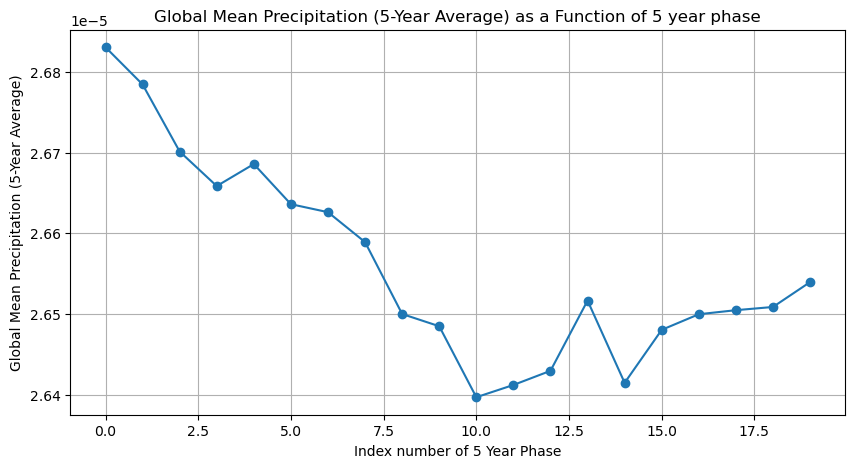

In [61]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Open the NetCDF file
dataset = nc.Dataset(file_path)

# Access the precipitation variable
precipitation = dataset.variables['pr']

# Read the precipitation data into a numpy array
precipitation_data = precipitation[:]

# Calculate the mean precipitation value for each 12 timesteps (1 year)
mean_precipitation = np.mean(precipitation_data.reshape((-1, 12, precipitation_data.shape[1], precipitation_data.shape[2])), axis=(1, 2, 3))

# Calculate the number of 5-year intervals
num_intervals = len(mean_precipitation) // 5

# Generate the list of 5-year averages
five_year_averages = [np.mean(mean_precipitation[i*5:(i*5)+5]) for i in range(num_intervals)]

# Generate the index numbers for the 5-year divisions
index_numbers = np.arange(len(five_year_averages))

# Increase the size of the output graph
plt.figure(figsize=(10, 5))

# Plot the 5-year averages as a scatter plot with straight lines
plt.plot(index_numbers, five_year_averages, marker='o', linestyle='-')
plt.xlabel('Index number of 5 Year Phase')
plt.ylabel('Global Mean Precipitation (5-Year Average)')
plt.title('Global Mean Precipitation (5-Year Average) as a Function of 5 ear phase')
plt.grid(True)

# Show the plot
plt.show()

# Close the NetCDF file
dataset.close()
